# The Sound of Cochlear Implants

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import librosa
import IPython.display as ipd
#import soundfile as sf
import wave
from scipy.io import wavfile
from scipy import signal



## Normal Audio

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


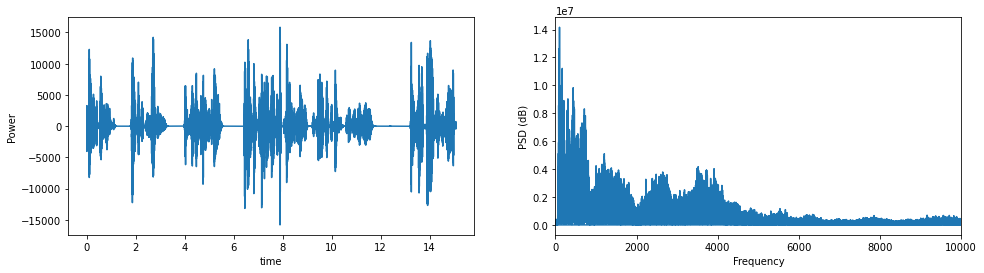

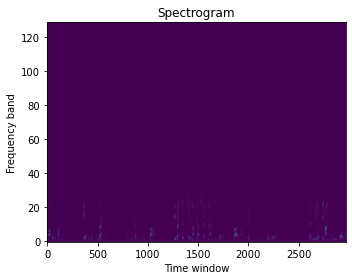

In [29]:
sr, x = wavfile.read('Media2.wav')#wave.open('Media2.wav')# librosa.load('Media2.wav')
N = len(x)
time=np.linspace(0, N/sr, int(N), endpoint=False)

fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/sr)
fft_new=np.fft.fft(x)
fig=plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2,2) 
ax.plot(freq, np.abs(fft_new))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')
ax.set_xlim(0,10000)
x_2000 = np.fft.ifft(fft_new)

ax = plt.subplot(1, 2, 1)
ax.plot(time, x_2000)
ax.set_xlabel('time')
ax.set_ylabel('Power')

freqs, times, spectrogram = signal.spectrogram(x,fs=sr)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto',  origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()


## Below 1000Hz

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power')

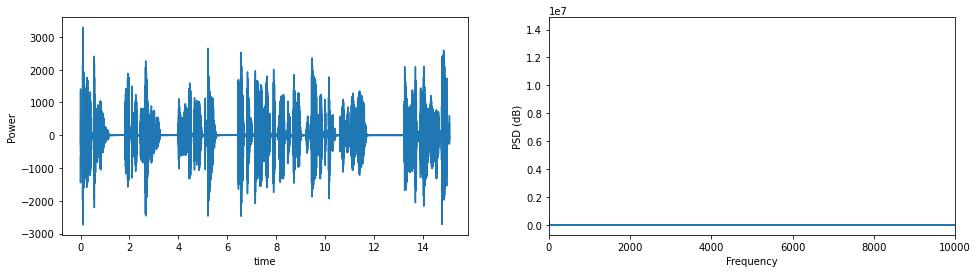

In [14]:
fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/sr)
fft_new=np.fft.fft(x)
fft_new[freq>1000]=0.001*fft_new[freq>1000]

fft_new[freq<-1000]=0.001*fft_new[freq<-1000]

fft_new[(freq>0)]=np.average(fft_new[(freq >0)])

fig=plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2,2) 
ax.plot(freq, np.abs(fft_new))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')
ax.set_xlim(0,10000)

x_1000 = np.fft.ifft(fft_new)

ax = plt.subplot(1, 2, 1)
ax.plot(time, x_1000)
ax.set_xlabel('time')
ax.set_ylabel('Power')



In [15]:
ipd.Audio(np.array(x_1000,dtype=float), rate=sr)

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


## Below 500Hz

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power')

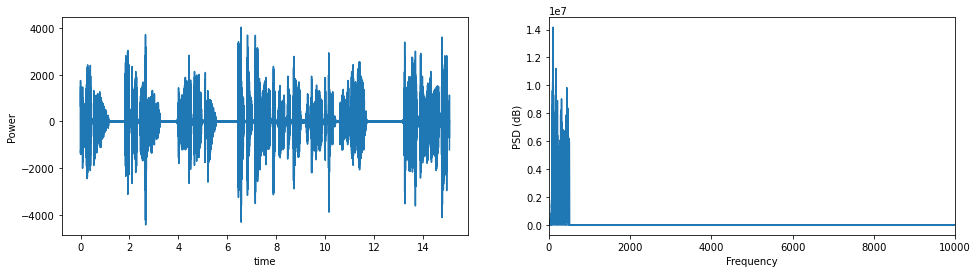

In [16]:
fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/sr)
fft_new=np.fft.fft(x)
fft_new[freq>500]=0.001*fft_new[freq>500]
fft_new[freq<-500]=0.001*fft_new[freq<-500]
fig=plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2,2) 
ax.plot(freq, np.abs(fft_new))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')
ax.set_xlim(0,10000)
plt.savefig('Oldman2000Hz.png', dpi=300)

x_500 = np.fft.ifft(fft_new)

ax = plt.subplot(1, 2, 1)
ax.plot(time, x_500)
ax.set_xlabel('time')
ax.set_ylabel('Power')

## Between 500Hz and 1000Hz

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power')

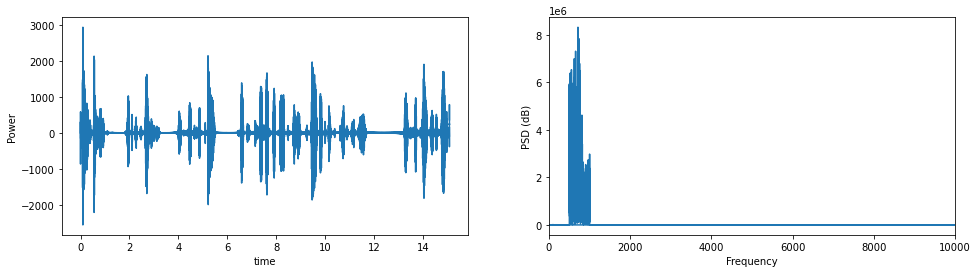

In [17]:
fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/sr)
fft_new=np.fft.fft(x)
fft_new[freq<500]=0.001*fft_new[freq<500]
fft_new[freq>1000]=0.001*fft_new[freq>1000]


fig=plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2,2) 
ax.plot(freq, np.abs(fft_new))
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')
ax.set_xlim(0,10000)
plt.savefig('Oldman2000Hz.png', dpi=300)

x_range = np.fft.ifft(fft_new)

ax = plt.subplot(1, 2, 1)
ax.plot(time, x_range)
ax.set_xlabel('time')
ax.set_ylabel('Power')

# Between 500 and 1000Hz

In [18]:
ipd.Audio(x_range, rate=sr)

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/IPython/lib/display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


# Below 500Hz

In [19]:
ipd.Audio(x_500, rate=sr)

# Below 1000Hz

In [20]:
ipd.Audio(x_1000, rate=sr)

# Original

In [21]:
ipd.Audio(x_2000, rate=sr)